<a href="https://colab.research.google.com/github/Ms-Ainebyona/Chest-Opacity-project/blob/colab-main/Final_Copy_of_Chest_Opacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing libraries

In [209]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
import keras.utils
from tensorflow import keras
from tensorflow.keras import layers, optimizers
from tensorflow.keras.models import Sequential
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import PIL
import PIL.Image
import pathlib
import glob
from tensorflow.keras.preprocessing import image
import pandas as pd
from tensorflow.keras.preprocessing import image

In [210]:
train_dir="/content/drive/MyDrive/Deep learning/Known"
predict_dir="/content/drive/MyDrive/Deep learning/new"
test_dir="/content/drive/MyDrive/Deep learning/Dataset2"

Defining model and parameters

In [600]:
import keras
from tensorflow.keras import layers
img_height=180
img_width=180
batch_size=32




Loading data from directory

In [602]:
ds_test=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
#label_path,
labels='inferred', 
label_mode="int", 
color_mode='grayscale',
batch_size=batch_size,
 image_size = (img_height,img_width),
 #crop_to_aspect_ratio=True,
  #interpolation="mitchellcubic" ,
  #seed=123,
                                                           
)

Found 224 files belonging to 2 classes.


In [603]:
ds_train=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
labels='inferred', 
label_mode="int", 
color_mode='grayscale',
batch_size=batch_size,
 image_size = (img_height,img_width),
 shuffle=True,
 seed=123, 
 validation_split=0.05,
 subset="training", 
  #crop_to_aspect_ratio=True,
  #interpolation="mitchellcubic",                                                             
)
ds_validation=tf.keras.preprocessing.image_dataset_from_directory(train_dir, 
labels='inferred', 
label_mode="int", 
color_mode='grayscale',
batch_size=batch_size,
 image_size = (img_height,img_width),
 shuffle=True,
 seed=123,
 validation_split=0.05,
 subset="validation",
  #crop_to_aspect_ratio=True,
  #interpolation="mitchellcubic", 
 )

ds_predict=tf.keras.preprocessing.image_dataset_from_directory(predict_dir, 
labels='inferred', 
label_mode="int", 
color_mode='grayscale',
batch_size=batch_size,
 image_size = (img_height,img_width),
 #shuffle=True,
 #seed=123,
#crop_to_aspect_ratio=True,
  #interpolation="mitchellcubic" 
)

def augment(X,Y):
  image=tf.image.random_brightness(X,max_delta=0.05)  
  ds_train=ds_train.map(augment) 
  for epoch in range(100):
   for X,Y in ds_train:
     pass


Found 715 files belonging to 2 classes.
Using 680 files for training.
Found 715 files belonging to 2 classes.
Using 35 files for validation.
Found 50 files belonging to 1 classes.


Standardize data

In [604]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

normalized_ds = ds_train.map(lambda x, y: (normalization_layer(x), y))


In [605]:
AUTOTUNE = tf.data.AUTOTUNE

ds_train = ds_train.cache().prefetch(buffer_size=AUTOTUNE)
ds_validation = ds_validation.cache().prefetch(buffer_size=AUTOTUNE)

In [606]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  1)),
    layers.RandomRotation(0.6),
    layers.RandomZoom(0.6),
  ]
)

In [607]:
model=keras.Sequential([
    data_augmentation,
    layers.Input((180,180,1)),
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(2),
    layers.Dense(128, activation='relu'),
  

])

Running the model

In [608]:
model.compile(
    optimizer='adam',
    loss=[
        keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    ],
    metrics=["accuracy"],
)  
history= model.fit(ds_train,epochs=30,batch_size=32,validation_data=ds_validation,verbose=2)   

Epoch 1/30
22/22 - 3s - loss: 2.4490 - accuracy: 0.2544 - val_loss: 0.8704 - val_accuracy: 0.4286 - 3s/epoch - 142ms/step
Epoch 2/30
22/22 - 1s - loss: 0.8102 - accuracy: 0.5353 - val_loss: 0.6735 - val_accuracy: 0.5714 - 554ms/epoch - 25ms/step
Epoch 3/30
22/22 - 1s - loss: 0.7103 - accuracy: 0.5779 - val_loss: 0.6369 - val_accuracy: 0.6571 - 550ms/epoch - 25ms/step
Epoch 4/30
22/22 - 1s - loss: 0.6843 - accuracy: 0.6029 - val_loss: 0.5133 - val_accuracy: 0.7429 - 554ms/epoch - 25ms/step
Epoch 5/30
22/22 - 1s - loss: 0.6679 - accuracy: 0.6176 - val_loss: 0.5430 - val_accuracy: 0.7714 - 550ms/epoch - 25ms/step
Epoch 6/30
22/22 - 1s - loss: 0.6618 - accuracy: 0.6368 - val_loss: 0.5070 - val_accuracy: 0.8571 - 551ms/epoch - 25ms/step
Epoch 7/30
22/22 - 1s - loss: 0.6470 - accuracy: 0.6324 - val_loss: 0.4443 - val_accuracy: 0.7429 - 555ms/epoch - 25ms/step
Epoch 8/30
22/22 - 1s - loss: 0.6015 - accuracy: 0.6529 - val_loss: 0.4818 - val_accuracy: 0.8286 - 549ms/epoch - 25ms/step
Epoch 9/30

Evaluating the model on the validation set

In [609]:

model.evaluate(ds_validation, verbose=2)

2/2 - 0s - loss: 0.3679 - accuracy: 0.8571 - 54ms/epoch - 27ms/step


[0.3679013252258301, 0.8571428656578064]

Visualization of model performance

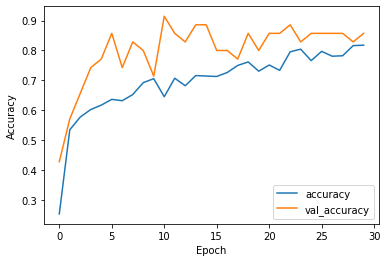

In [610]:
# Visualization of training accuracy and loss curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

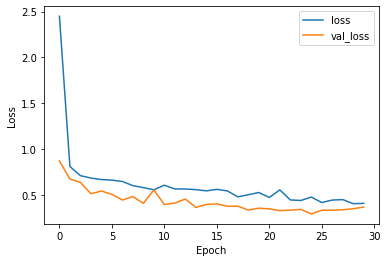

In [611]:
# Visualization of the training accuracy and loss curves
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

In [612]:
saved_model_path = "/content/drive/MyDrive/Models/custom3-weights/saved_model.h5"

Predictions on the test set (Dataset2)

In [613]:
# Predictions
preds = model.predict(ds_test)

In [614]:
len(preds)

224

In [615]:
# Get classes
pred_classes = (preds>=0.5).astype(int)

In [616]:
#ds_validation.class_names

In [617]:

















y_pred = []  # storing predicted labels
y_true = []  # storing true labels

for image_batch, label_batch in ds_test:
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

In [618]:
correct_labels

<tf.Tensor: shape=(224,), dtype=int32, numpy=
array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1], dtype=int32)>

In [619]:
correct_labels.shape

TensorShape([224])

In [620]:
predicted_labels

<tf.Tensor: shape=(224,), dtype=int64, numpy=
array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1])>

In [621]:
y_pred

[array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 1]),
 array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 1]),
 array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 1, 1, 1, 1, 0]),
 array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 0]),
 array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 1, 0, 1, 1, 1]),
 array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 0, 1, 1, 0, 0, 1, 1])]

In [622]:
y_true

[<tf.Tensor: shape=(32,), dtype=int32, numpy=
 array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int32)>,
 <tf.Tensor: shape=(32,), dtype=int32, numpy=
 array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int32)>,
 <tf.Tensor: shape=(32,), dtype=int32, numpy=
 array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
        0, 1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int32)>,
 <tf.Tensor: shape=(32,), dtype=int32, numpy=
 array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int32)>,
 <tf.Tensor: shape=(32,), dtype=int32, numpy=
 array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int32)>,
 <tf.Tensor: shape=(32,), dtype=int32, numpy=
 array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        1,

Confusion matrix

In [623]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(predicted_labels, correct_labels)

array([[53, 35],
       [59, 77]])

Classification report

In [624]:
from sklearn.metrics import classification_report
print(classification_report(
  correct_labels, 
  predicted_labels, 
  

))

              precision    recall  f1-score   support

           0       0.60      0.47      0.53       112
           1       0.57      0.69      0.62       112

    accuracy                           0.58       224
   macro avg       0.58      0.58      0.58       224
weighted avg       0.58      0.58      0.58       224



Saving model weights

In [625]:
saved_model_path = "/content/drive/MyDrive/Models/custom2-weights/saved_model.h5"
model.save(saved_model_path)

Predicting the unknown images

In [626]:
from tensorflow.keras import layers, models, utils, losses, callbacks
import pandas as pd
import numpy as np

In [627]:
prediction_model_on_unknown = models.load_model(saved_model_path)
unknown_preds  = prediction_model_on_unknown.predict(ds_predict)
unknown_pred_classes = np.argmax(unknown_preds, axis=1)

Converting the predictions to  a dataframe

In [628]:
res_df = pd.DataFrame({
    "patient" : ds_predict.file_paths,
    "diagnosis (0-Normal, 1-Sick)": unknown_pred_classes
    
})

res_df.head(20)

,patient,"diagnosis (0-Normal, 1-Sick)"
0,/content/drive/MyDrive/Deep learning/new/unkno...,0
1,/content/drive/MyDrive/Deep learning/new/unkno...,0
2,/content/drive/MyDrive/Deep learning/new/unkno...,1
3,/content/drive/MyDrive/Deep learning/new/unkno...,0
4,/content/drive/MyDrive/Deep learning/new/unkno...,0
5,/content/drive/MyDrive/Deep learning/new/unkno...,0
6,/content/drive/MyDrive/Deep learning/new/unkno...,1
7,/content/drive/MyDrive/Deep learning/new/unkno...,1
8,/content/drive/MyDrive/Deep learning/new/unkno...,0
9,/content/drive/MyDrive/Deep learning/new/unkno...,1


In [634]:
# save the dataframe as a csv file
res_df.to_csv("/content/drive/MyDrive/Models(1)", index=False)